In [1]:
import yfinance as yf
import json

# Récupérer les données pour une action spécifique
ticker = "AAPL"  # Exemple : Apple Inc.
stock_data = yf.Ticker(ticker)

# Récupérer les informations principales
info = stock_data.info

print(info)


{'address1': 'One Apple Park Way', 'city': 'Cupertino', 'state': 'CA', 'zip': '95014', 'country': 'United States', 'phone': '408 996 1010', 'website': 'https://www.apple.com', 'industry': 'Consumer Electronics', 'industryKey': 'consumer-electronics', 'industryDisp': 'Consumer Electronics', 'sector': 'Technology', 'sectorKey': 'technology', 'sectorDisp': 'Technology', 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. In add

In [2]:
# Récupérer l'historique des prix sur une période donnée
historical_data = stock_data.history(period="1y")  # Exemple : sur 1 an

# Créer un dictionnaire avec les données récupérées
data_dict = {
    "ticker": ticker,
    "company_info": info,
    "historical_data": historical_data.to_dict(orient="records")  # Convertir le DataFrame en liste de dictionnaires
}

print(data_dict)

{'ticker': 'AAPL', 'company_info': {'address1': 'One Apple Park Way', 'city': 'Cupertino', 'state': 'CA', 'zip': '95014', 'country': 'United States', 'phone': '408 996 1010', 'website': 'https://www.apple.com', 'industry': 'Consumer Electronics', 'industryKey': 'consumer-electronics', 'industryDisp': 'Consumer Electronics', 'sector': 'Technology', 'sectorKey': 'technology', 'sectorDisp': 'Technology', 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music,

c:\Users\yskon\anaconda3.2\envs\Projet_Final_App\lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [3]:
import yfinance as yf
import pandas as pd
import talib

# Retrieve historical price data using yfinance
ticker = "AAPL"  # Example stock symbol (Apple Inc.)
start_date = "2021-01-01"
end_date = "2022-01-01"
data = yf.download(ticker, start=start_date, end=end_date)

# Calculate moving averages (e.g., SMA and EMA)
data['SMA'] = data['Close'].rolling(window=20).mean()  # 20-day Simple Moving Average
data['EMA'] = data['Close'].ewm(span=20, adjust=False).mean()  # 20-day Exponential Moving Average

# Calculate RSI (Relative Strength Index)
data['RSI'] = talib.RSI(data['Close'], timeperiod=14)

# Calculate MACD (Moving Average Convergence Divergence)
macd, signal, _ = talib.MACD(data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
data['MACD'] = macd
data['Signal'] = signal

# Calculate Bollinger Bands
upper_band, middle_band, lower_band = talib.BBANDS(data['Close'], timeperiod=20)
data['UpperBand'] = upper_band
data['MiddleBand'] = middle_band
data['LowerBand'] = lower_band

# Display the data
print(data.tail())


c:\Users\yskon\anaconda3.2\envs\Projet_Final_App\lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-12-27  177.089996  180.419998  177.070007  180.330002  178.065659   
2021-12-28  180.160004  181.330002  178.529999  179.289993  177.038742   
2021-12-29  179.330002  180.630005  178.139999  179.380005  177.127625   
2021-12-30  179.470001  180.570007  178.089996  178.199997  175.962402   
2021-12-31  178.089996  179.229996  177.259995  177.570007  175.340332   

              Volume       SMA         EMA        RSI      MACD    Signal  \
Date                                                                        
2021-12-27  74919600  171.4630  171.009600  66.890408  5.051209  5.174498   
2021-12-28  79144300  172.4155  171.798209  64.950263  5.102919  5.160182   
2021-12-29  62348900  173.1195  172.520285  65.044762  5.092459  5.146637   
2021-12-30  59773000  173.7910  173.061210  62.659680  4.932099  5.103730   
2021-12-31  6406230

c:\Users\yskon\anaconda3.2\envs\Projet_Final_App\lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
c:\Users\yskon\anaconda3.2\envs\Projet_Final_App\lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[                       0%%                      ]c:\Users\yskon\anaconda3.2\envs\Projet_Final_App\lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  3 of 3 completed

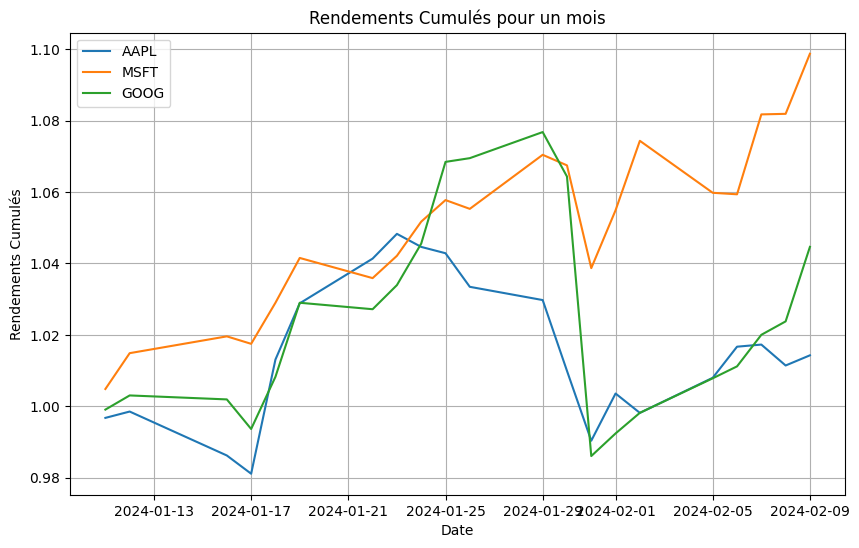

In [7]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Télécharger les données historiques des prix pour plusieurs actifs
tickers = ["AAPL", "MSFT", "GOOG"]  # Exemple : Apple, Microsoft, Google
data = yf.download(tickers, period="1mo")['Adj Close']

# Calculer les rendements quotidiens pour chaque actif
returns = data.pct_change()

# Calculer les rendements cumulés pour chaque actif
cumulative_returns = (1 + returns).cumprod()

# Tracer le graphique des rendements cumulés
plt.figure(figsize=(10, 6))
for ticker in tickers:
    plt.plot(cumulative_returns.index, cumulative_returns[ticker], label=ticker)

plt.title("Rendements Cumulés pour un mois")
plt.xlabel("Date")
plt.ylabel("Rendements Cumulés")
plt.legend()
plt.grid(True)
plt.show()


In [2]:
import talib
from talib import stream

ModuleNotFoundError: No module named 'talib'